In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Practice\Machine Learning Project\Forecasting\study-2\course-material\Time Series Analysis\Introduction to Time Series Forecasting\bitcoin_price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.set_index("Date", inplace=True)

In [6]:
df.loc['2021-11-09']

Open         6.754973e+04
High         6.853034e+04
Low          6.638206e+04
Close        6.697183e+04
Adj Close    6.697183e+04
Volume       4.235799e+10
Name: 2021-11-09 00:00:00, dtype: float64

In [7]:
# Set the index when we import the data
df1 = pd.read_csv(r'D:\Practice\Machine Learning Project\Forecasting\study-2\course-material\Time Series Analysis\Introduction to Time Series Forecasting\bitcoin_price.csv', index_col='Date', parse_dates=True)

In [8]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
df.resample("W").mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


### Exploratory Data Analysis (EDA)

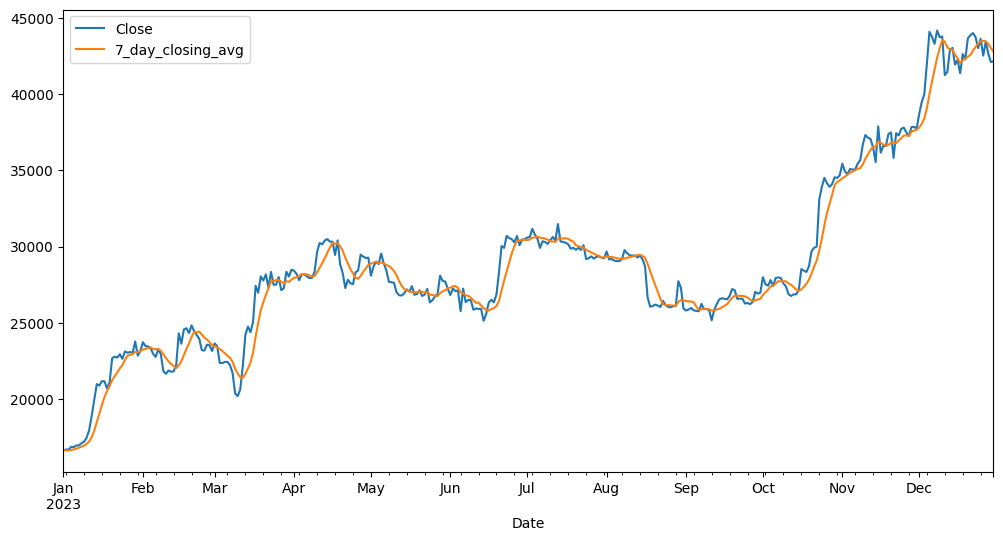

In [10]:
# Generate a 7-day rolling avg for Closing Price
df["7_day_closing_avg"] = df["Close"].rolling(window=7).mean()

# Plot the Closing Price and the 7-day rolling average
df[["Close", "7_day_closing_avg"]].loc["2023"].plot(figsize=(12, 6))
plt.show()

In [11]:
# Find the month with the highest closing average
df.resample("ME").max()["Close"].idxmax()

Timestamp('2021-11-30 00:00:00')

In [12]:
# Preview the last 5 rows of the dataset
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg
Date,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254


In [13]:
# Compute the percentage change for the close variable
df["daily_returns_100%"] = df["Close"].pct_change()*100

In [14]:
# Let's check which days had more than 10% change in price
df[df["daily_returns_100%"].abs() > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


### Data Visualization

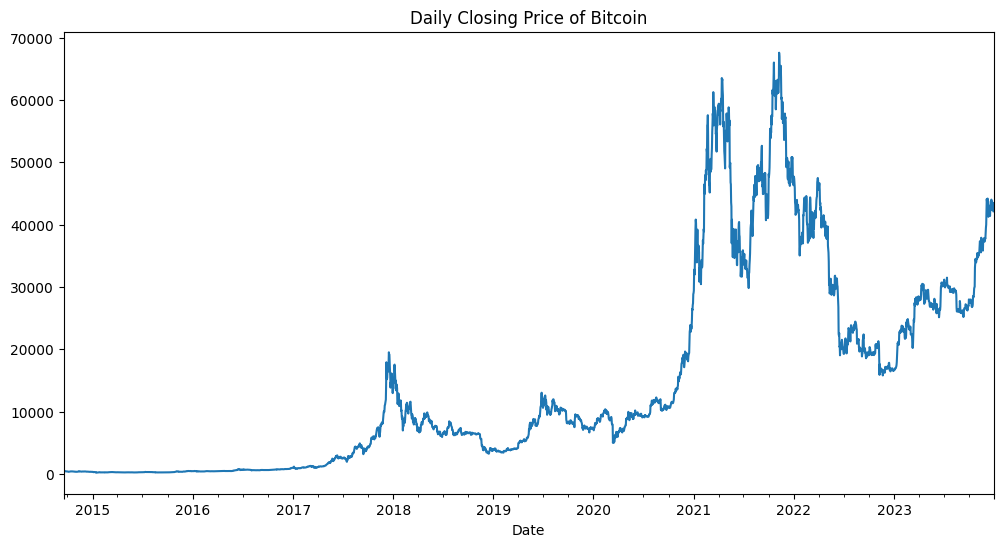

In [15]:
# Daily Closing Price Plot
df["Close"].plot(figsize=(12, 6))
plt.title("Daily Closing Price of Bitcoin")
plt.show()

In [16]:
# Create a variable for the 30 day rolling average
df["30_day_rolling_vol"] = df["Volume"].rolling(window=30).mean()

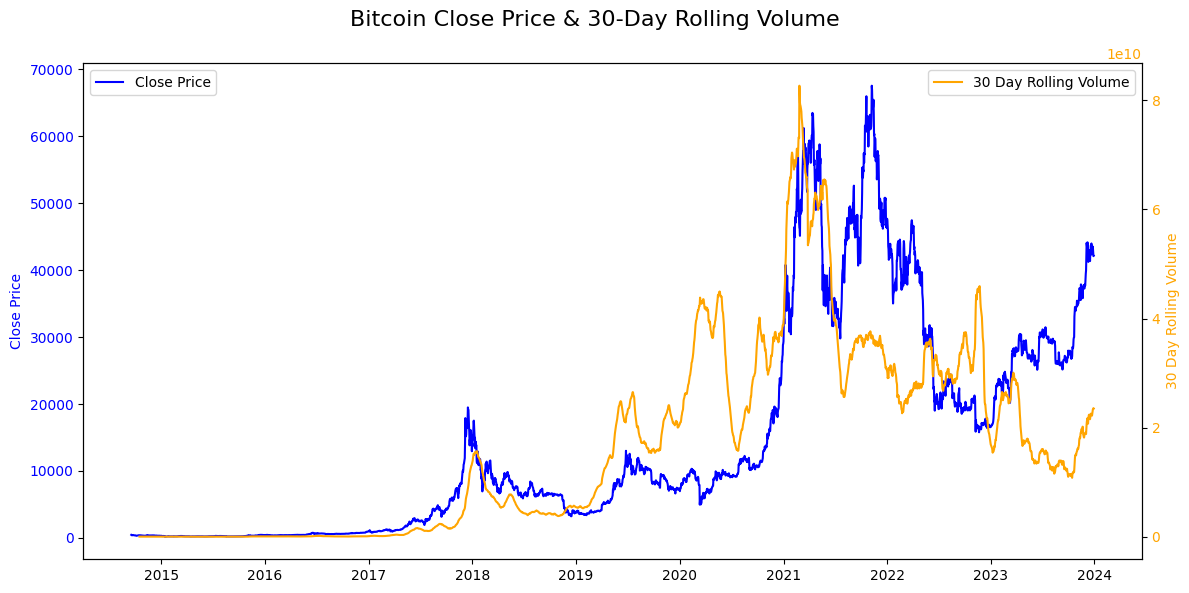

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df["Close"], label="Close Price", color="blue")
ax.set_ylabel("Close Price", color="blue")
ax.tick_params(axis='y', labelcolor="blue")

ax2 = ax.twinx()
ax2.plot(df.index, df["30_day_rolling_vol"], color="orange", label="30 Day Rolling Volume")
ax2.set_ylabel("30 Day Rolling Volume", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

fig.suptitle("Bitcoin Close Price & 30-Day Rolling Volume", fontsize=16)
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [18]:
# Perform correlation between closing price and 30 day rolling volume
df["30_day_rolling_vol"].corr(df["Close"])

np.float64(0.7504453796186049)

In [19]:
df[["Close", "30_day_rolling_vol"]].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


-> Pearson Correlation, which often is not ideal for Time Series. You might want to check Spearman Correlation.

If we do the Pearson Correlation, it's still 90% correct

### Data Manipulation

In [20]:
# Identify missing values
df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7_day_closing_avg      6
daily_returns_100%     1
30_day_rolling_vol    29
dtype: int64

In [21]:
# Fill missing values with the next observations
# Dau 29 is missing
# Day 30 we have value
# Day 29 now has the value of Day 30

In [22]:
# Method 1:
df["30_day_rolling_vol"] = df["30_day_rolling_vol"].bfill() # May cause some leakage if used in a forecasting model

In [23]:
# Method 2:
df["7_day_closing_avg"] = df["7_day_closing_avg"].interpolate(method='linear') 

In [24]:
# Fetch the index
df.index.dayofweek

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [25]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["weekday"] = df.index.day_name()
df["weekday_numeric"] = df.index.weekday

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6


In [26]:
# Set astype to integer to have binary
df["is_weekend"] = df["weekday_numeric"].isin([5, 6]).astype(int)

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1


### Seasonality

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

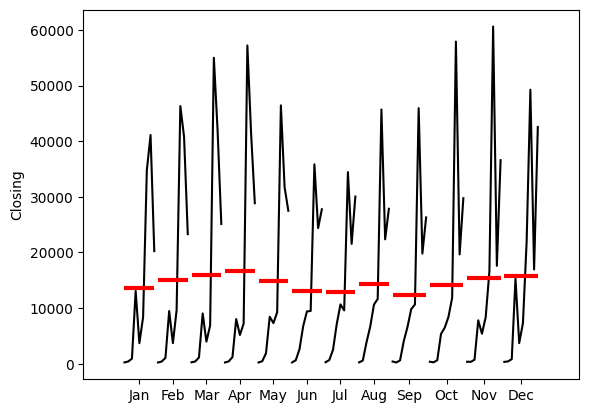

In [29]:
# Monthly seasonality
month_plot(df["Close"].resample("ME").mean(),
           ylabel="Closing");

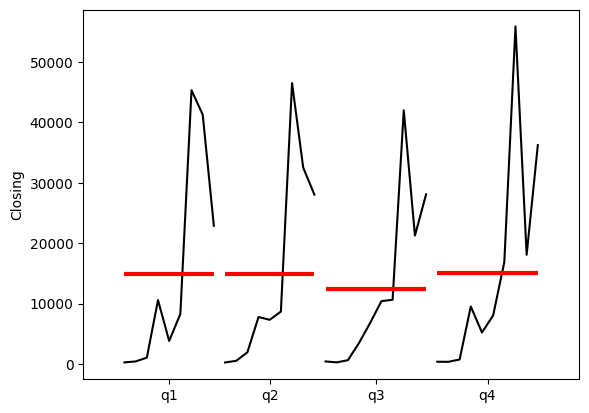

In [30]:
# Quarter plot
quarter_plot(df["Close"].resample("QE").mean(),
             ylabel="Closing");

In [31]:
# Import second dataset
df_choco = pd.read_csv(r'D:\Practice\Machine Learning Project\Forecasting\study-2\course-material\Time Series Analysis\Introduction to Time Series Forecasting\choco_monthly_revenue.csv',
                    index_col='Month with Year', parse_dates=True)

In [32]:
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


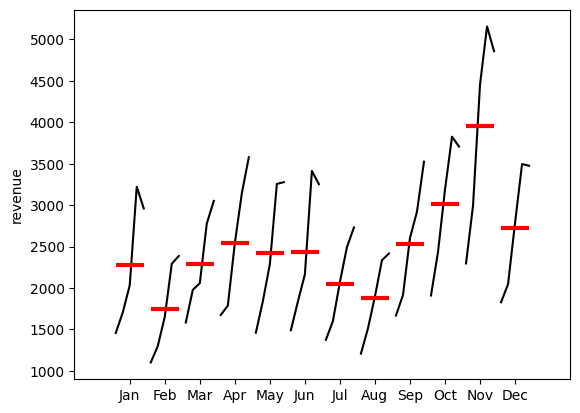

In [33]:
# Plot the month_plot for df_choco
month_plot(df_choco["revenue"],
           ylabel="revenue");

### Seasonal_decompose only allows 1 seasonality

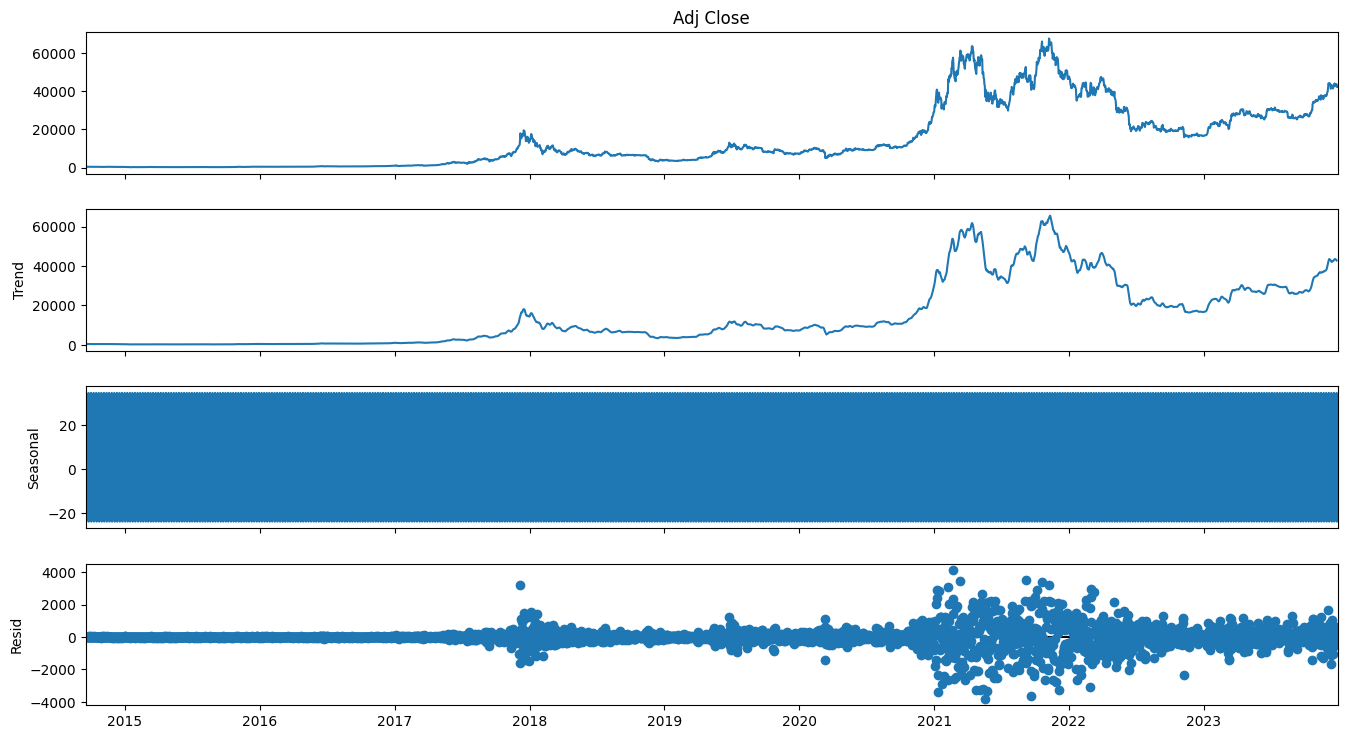

In [34]:
# seasonal decomposition for df["Adj. Close"]
decomp = seasonal_decompose(df["Adj Close"], model='additive',period=7)
fig = decomp.plot();
fig.set_size_inches(15, 8)
plt.show()

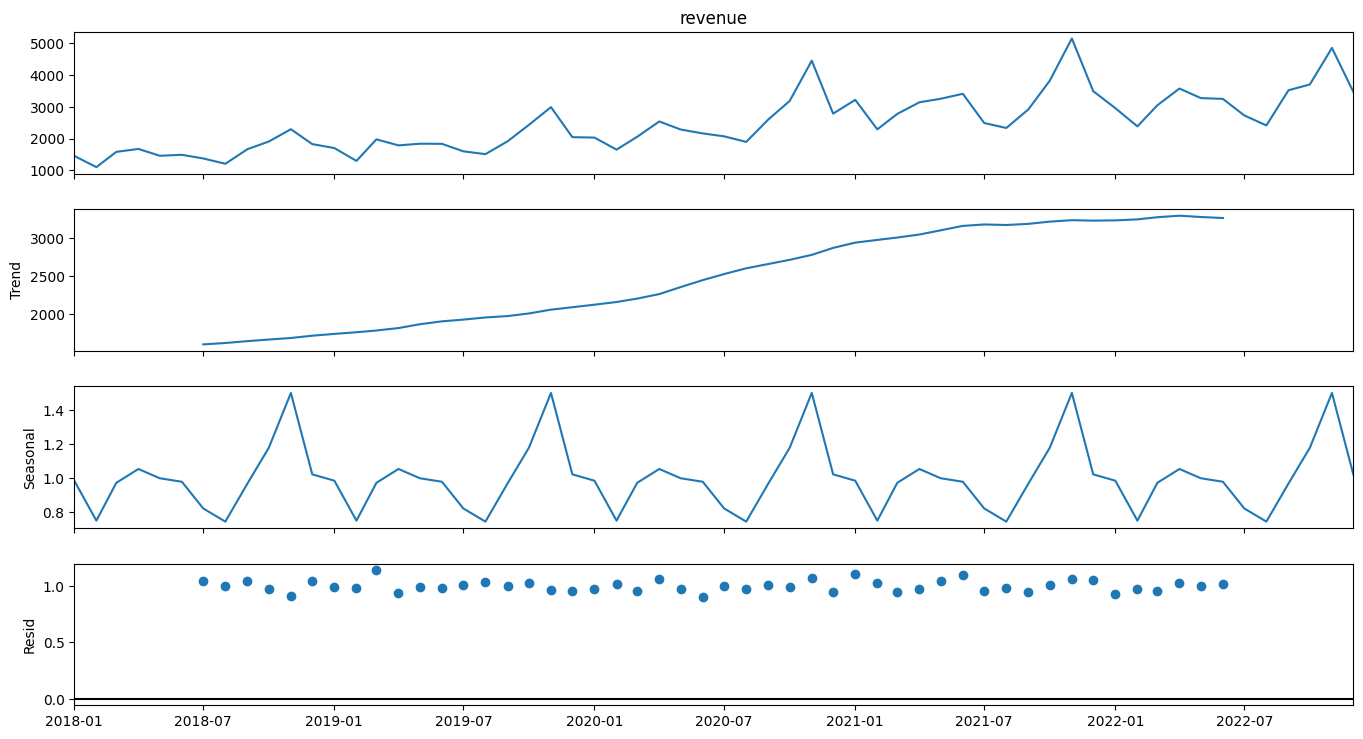

In [35]:
# Seasonality for df_choco
decomposition = seasonal_decompose(df_choco["revenue"], 
                                   model='multiplicative', 
                                   period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

### Auto-correlation

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

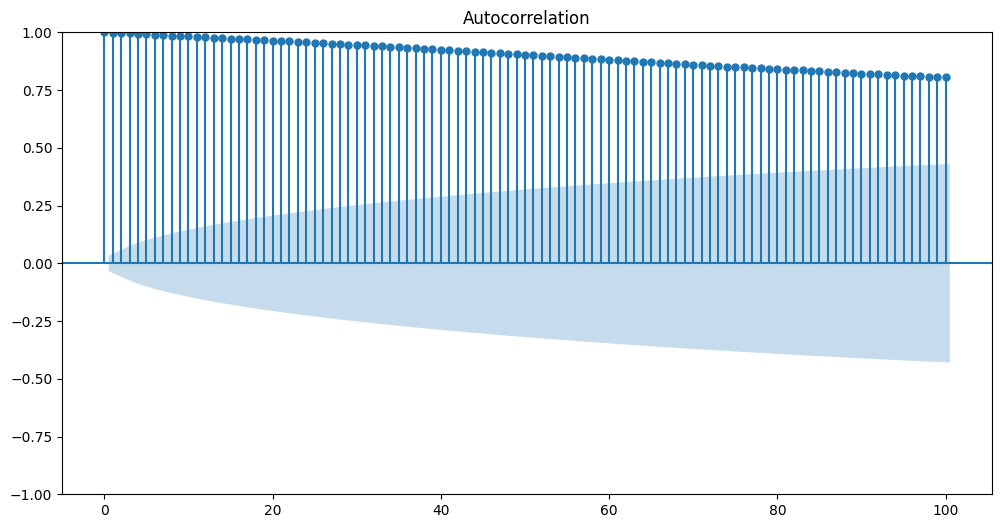

In [40]:
# Plot the ACF of the Bitcoin Adj Close
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df["Adj Close"], lags = 100, ax=ax);

In [41]:
# Preview the info of df_choco
df_choco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


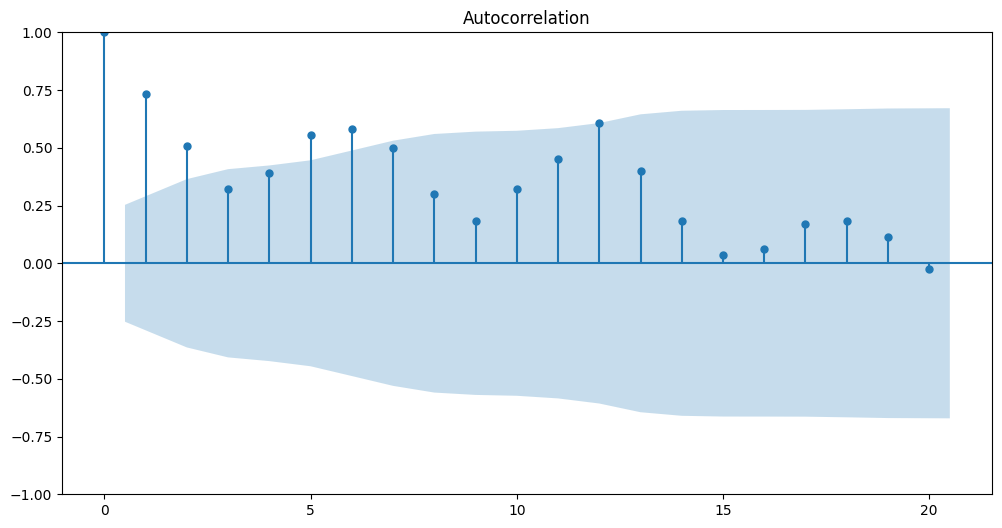

In [42]:
# Plot the ACF of the revenue kpi in df_choco
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df_choco["revenue"], lags = 20, ax=ax);

### Partial Auto Correlation Function

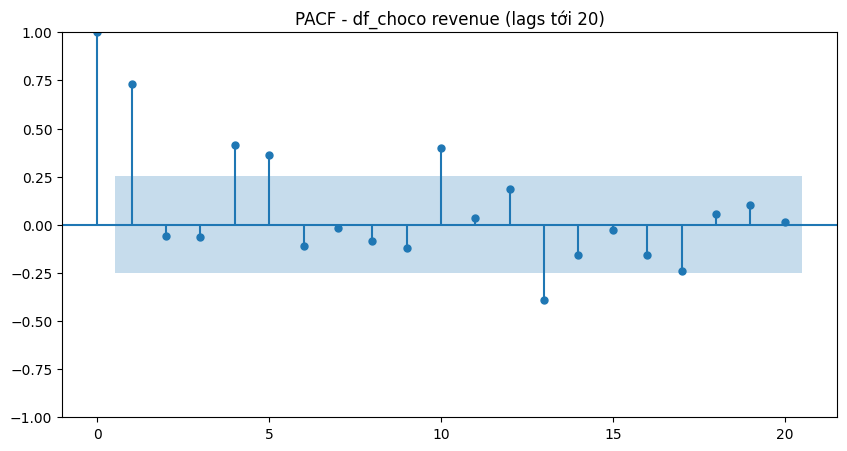

Partial correlation lag 1: 0.7325
Partial correlation lag 2: -0.0579
Partial correlation lag 3: -0.0635


In [43]:
# PACF cho chuỗi doanh thu (revenue) của df_choco
# Ý tưởng: mỗi cột (bar) ở lag k là hệ số tương quan riêng (partial) giữa X_t và X_{t-k}
# sau khi đã loại bỏ ảnh hưởng tuyến tính của toàn bộ các lag 1..k-1.
# Nó được ước lượng trên TOÀN BỘ các cặp (không phải chỉ so sánh riêng ngày cuối cùng).

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

series = df_choco["revenue"].astype(float)

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(series, lags=20, ax=ax, method="ywm")  # ywm (Yule-Walker mod.) ổn định với nhiều TS
ax.set_title("PACF - df_choco revenue (lags tới 20)")
plt.show()

# Lấy trực tiếp các giá trị partial autocorrelation cho lags 1..3 để minh hoạ câu hỏi của bạn
pacf_vals = pacf(series, nlags=3, method='ywm')  # pacf_vals[0] = lag0 (=1.0)
for k, v in enumerate(pacf_vals[1:], start=1):
    print(f"Partial correlation lag {k}: {v:.4f}")

# Giải thích nhanh:
# - Lag 1: mức liên hệ trực tiếp giữa hôm nay và hôm qua.
# - Lag 2: liên hệ giữa hôm nay và 2 ngày trước, SAU KHI đã loại (partial out) tác động của lag 1.
# - Lag 3: liên hệ giữa hôm nay và 3 ngày trước, SAU KHI đã loại đồng thời tác động của lags 1 và 2.
# Vì vậy các giá trị trên KHÔNG phải chỉ riêng cho ngày cụ thể (ví dụ 20-11-2020),
# mà là ước lượng trung bình thống kê trên toàn bộ mẫu dữ liệu.

# Nếu bạn muốn xem "hôm nay" chịu ảnh hưởng của quá khứ ra sao theo dạng mô hình AR(p),
# bạn có thể fit thử ARIMA(p,0,0) với p được gợi ý bởi số lag PACF có ý nghĩa.


### Partial Auto Correlation

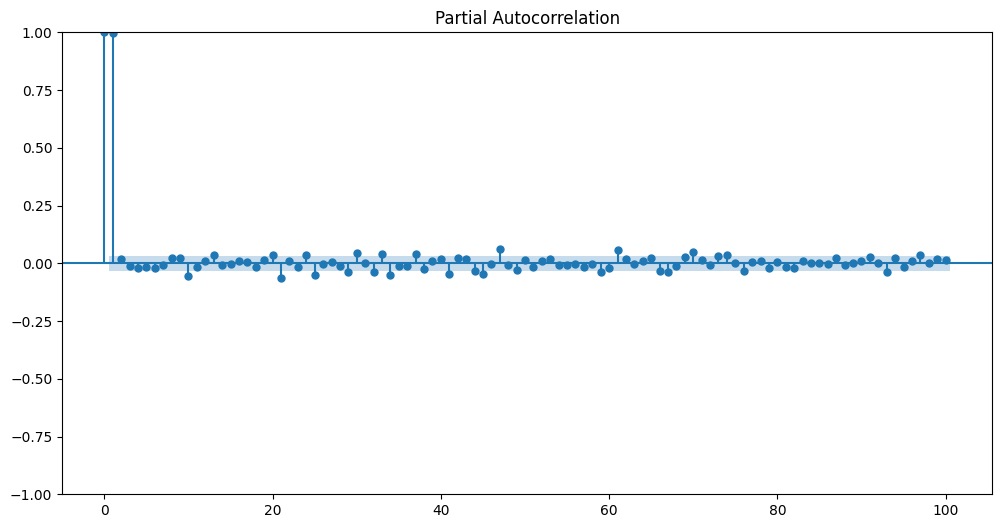

In [46]:
# PACF for bitcoin adj close
fig,ax = plt.subplots(figsize=(12, 6))
plot_pacf(df["Adj Close"], lags=100, ax=ax, method="ywm");

The only relevant information for the price of bitcoin is what happened the day before

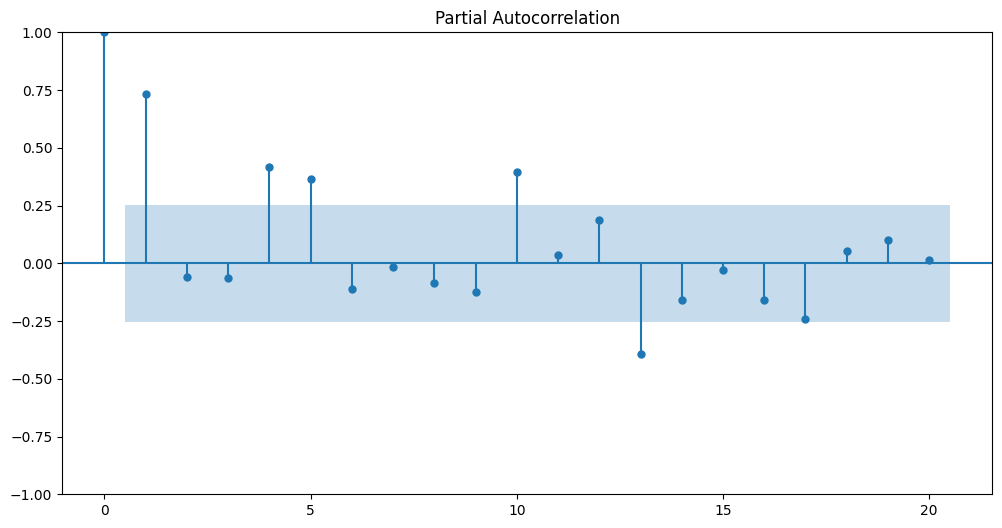

In [48]:
# PACF for choco
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df_choco["revenue"], lags=20, ax=ax, method="ywm");